         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               moves opening_e

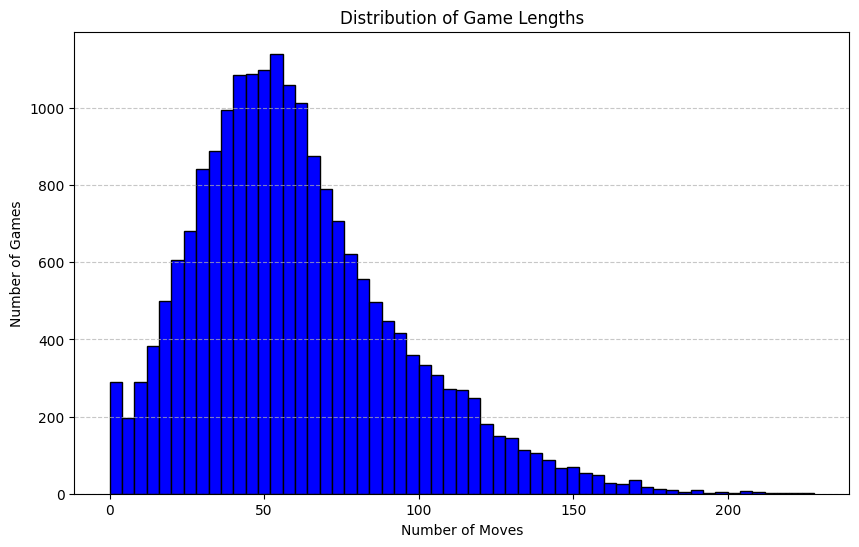

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('games.csv')

print(data.head())

# Average number of moves per game
average_turns = data['turns'].mean()
print("Average number of moves per game:", average_turns)

# Histogram of game length (number of moves per game)
plt.figure(figsize=(10, 6))
plt.hist(data['turns'], bins=range(0, 230, 4), color='blue', edgecolor='black')
plt.title('Distribution of Game Lengths')
plt.xlabel('Number of Moves')
plt.ylabel('Number of Games')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


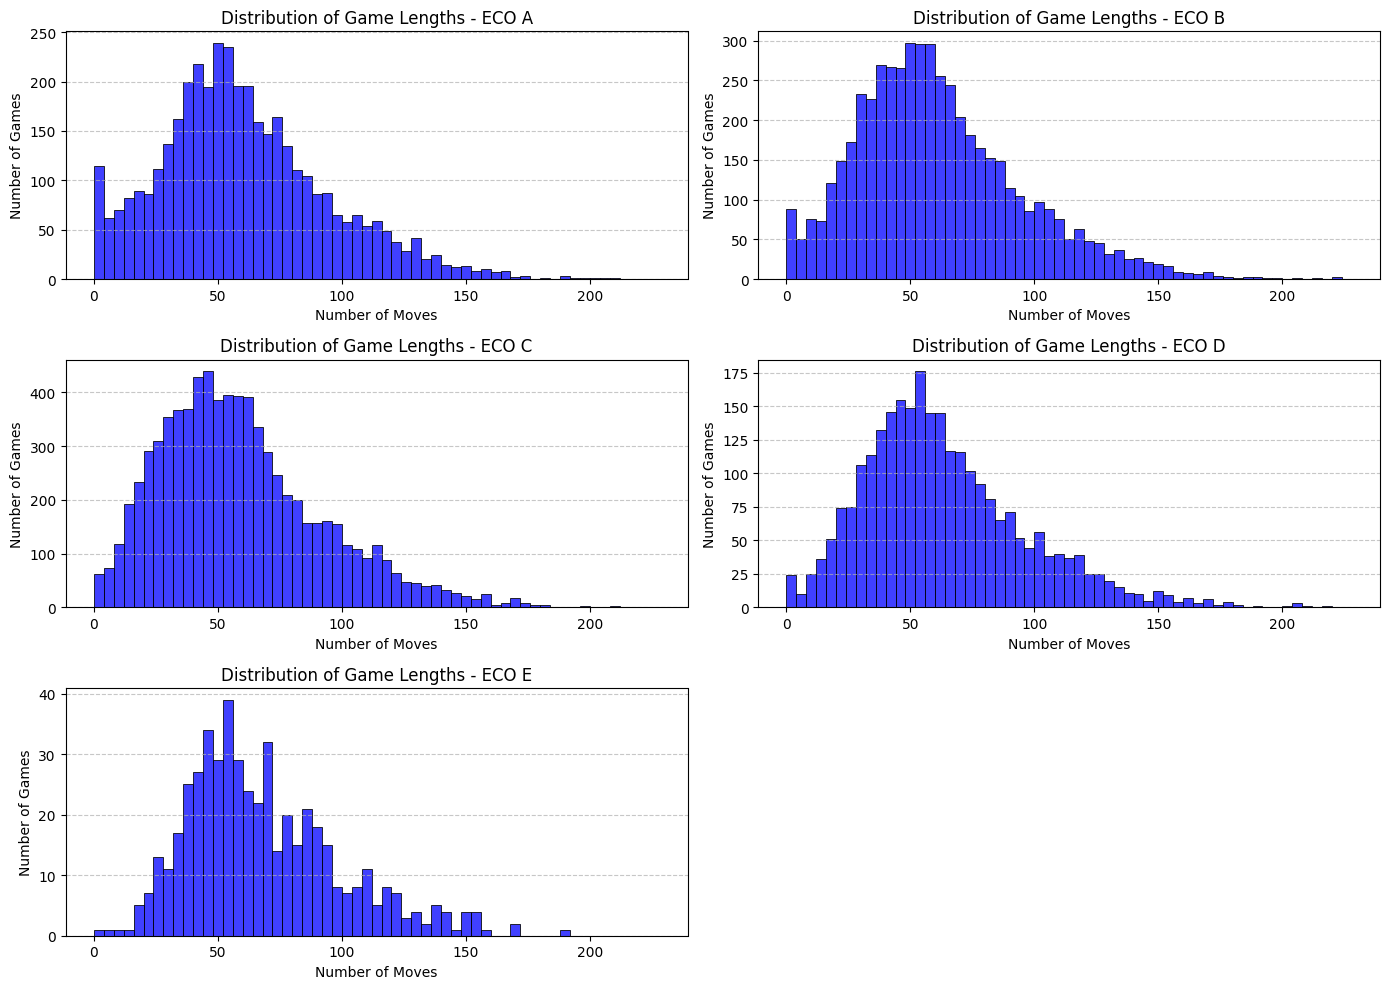

In [7]:
# Adding 'opening_eco' to group the games by ECO (opening categories)
# Filtering to display only games categorized by main ECO groups (A, B, C, D, E)

# Filtering the data to include only the main ECO categories (A to E)
eco_filtered_data = data[data['opening_eco'].str.startswith(('A', 'B', 'C', 'D', 'E'))].copy()

# Creating subplots to visualize the distribution of game lengths by ECO category
plt.figure(figsize=(14, 10))

# Plotting a histogram for each ECO category
for i, eco in enumerate(['A', 'B', 'C', 'D', 'E'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(eco_filtered_data[eco_filtered_data['opening_eco'].str.startswith(eco)]['turns'], 
                 bins=range(0, 230, 4), color='blue', edgecolor='black')
    plt.title(f'Distribution of Game Lengths - ECO {eco}')
    plt.xlabel('Number of Moves')
    plt.ylabel('Number of Games')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


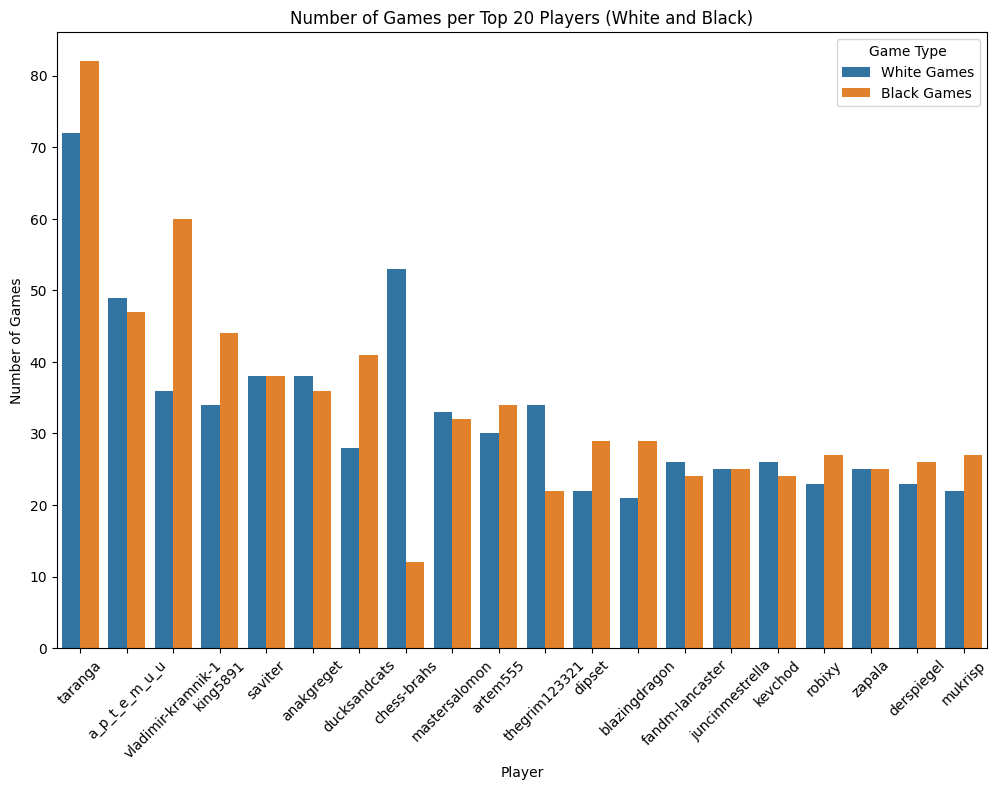

In [5]:
# Number of games by player (with white, with black)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
data = pd.read_csv('games.csv')

# Counting the number of games each player has played as White and Black
white_games = data['white_id'].value_counts().reset_index()
white_games.columns = ['Player', 'White Games']

black_games = data['black_id'].value_counts().reset_index()
black_games.columns = ['Player', 'Black Games']

# Merging both counts into a single DataFrame
games_per_player = pd.merge(white_games, black_games, on='Player', how='outer').fillna(0)
games_per_player['White Games'] = games_per_player['White Games'].astype(int)
games_per_player['Black Games'] = games_per_player['Black Games'].astype(int)

# Selecting the top 20 players by total games played
games_per_player['Total Games'] = games_per_player['White Games'] + games_per_player['Black Games']
top_players = games_per_player.nlargest(20, 'Total Games')

# Reshaping the data for easier plotting with seaborn
top_players_melted = top_players.melt(id_vars='Player', value_vars=['White Games', 'Black Games'],
                                      var_name='Game Type', value_name='Number of Games')

# Plotting the number of games each top player has played as White and Black
plt.figure(figsize=(12, 8))
sns.barplot(data=top_players_melted, x='Player', y='Number of Games', hue='Game Type')
plt.title('Number of Games per Top 20 Players (White and Black)')
plt.xlabel('Player')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.legend(title='Game Type')
plt.show()


Distribution of game results by color:

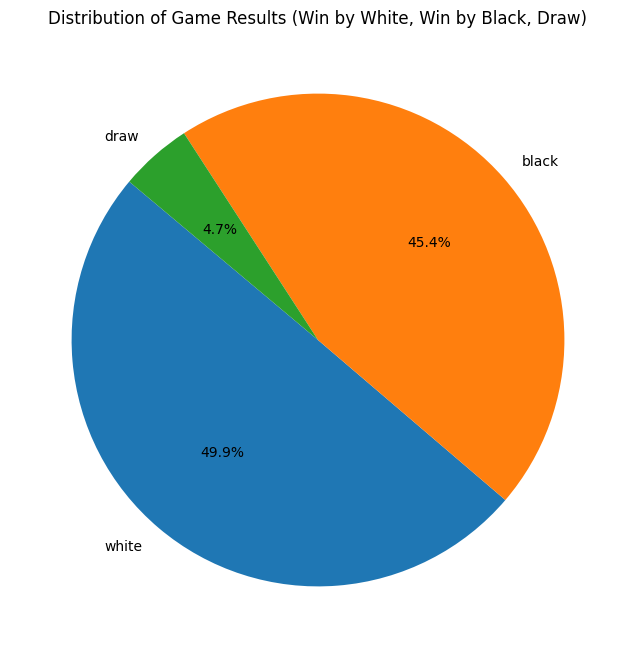

C:\Users\emman\AppData\Local\Temp\ipykernel_19796\2073415854.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_distribution, x='Result', y='Percentage', palette="Blues_d")


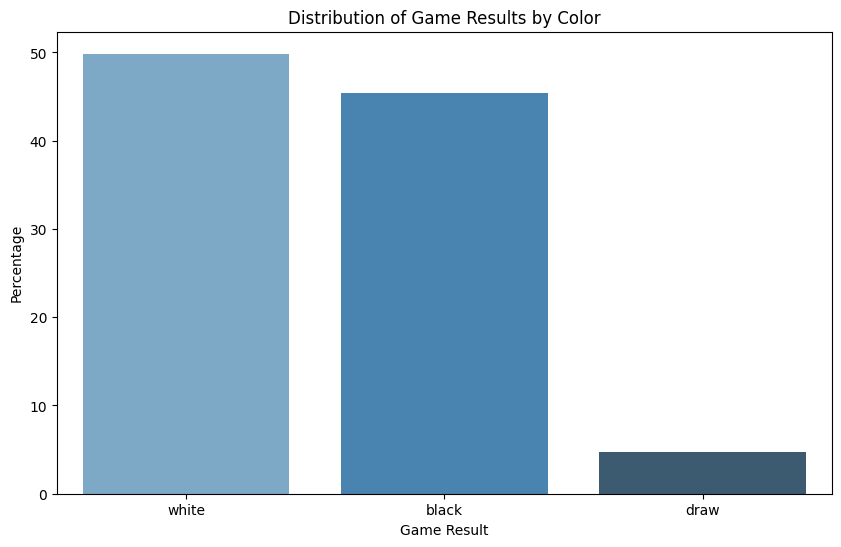

In [8]:

# Counting the number of games by victory status and winner color
results_distribution = data['winner'].value_counts(normalize=True) * 100
results_distribution = results_distribution.reset_index()
results_distribution.columns = ['Result', 'Percentage']

# Mapping values for clarity (e.g., replace None with 'Draw' if applicable)
results_distribution['Result'] = results_distribution['Result'].fillna('Draw')

# Plotting the distribution as a pie chart to show percentage of wins by color and draws
plt.figure(figsize=(8, 8))
plt.pie(results_distribution['Percentage'], labels=results_distribution['Result'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Game Results (Win by White, Win by Black, Draw)')
plt.show()

# Also plotting a bar chart for a different perspective
plt.figure(figsize=(10, 6))
sns.barplot(data=results_distribution, x='Result', y='Percentage', palette="Blues_d")
plt.title('Distribution of Game Results by Color')
plt.xlabel('Game Result')
plt.ylabel('Percentage')
plt.show()


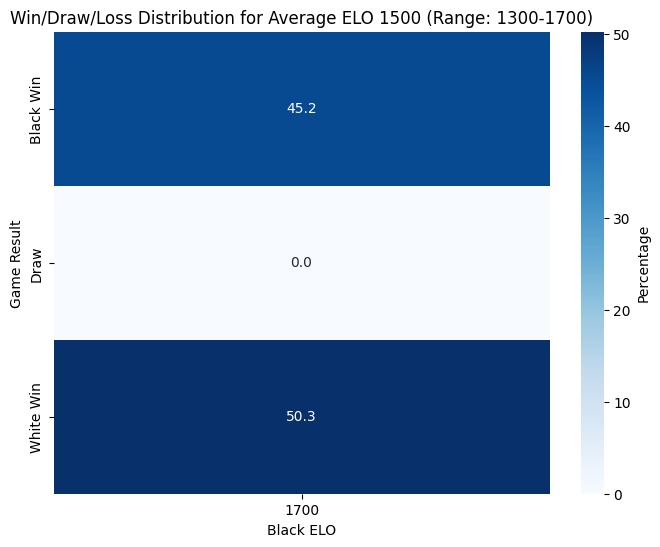

In [10]:
# Function to calculate win/draw/loss percentages based on game results and player colors
def calculate_result_distribution(data, white_elo, black_elo):
    # Calculate the counts for each possible game result (White Win, Black Win, Draw)
    results = {
        "White Win": len(data[(data['winner'] == 'white')]),
        "Black Win": len(data[(data['winner'] == 'black')]),
        "Draw": len(data[(data['winner'].isna())])  # assuming draw is represented by NaN in 'winner' column
    }
    # Total number of games in the filtered data
    total_games = len(data)
    
    # Create a DataFrame with percentages for each result type
    result_df = pd.DataFrame({
        'White ELO': [white_elo] * 3,
        'Black ELO': [black_elo] * 3,
        'Result': ['White Win', 'Black Win', 'Draw'],
        'Percentage': [value / total_games * 100 for value in results.values()]
    })
    
    return result_df



# Filtering games within ±200 points of the most frequent average ELO (1500)
elo_1500_plus_200 = data[
    ((data['white_rating'].between(1300, 1700)) & (data['black_rating'].between(1300, 1700)))
]

# Checking if there is sufficient data, otherwise use ±100 points range
if len(elo_1500_plus_200) < 100:  # Arbitrary threshold for "sufficient data"
    elo_1500_plus_100 = data[
        ((data['white_rating'].between(1400, 1600)) & (data['black_rating'].between(1400, 1600)))
    ]
    sufficient_data = False
else:
    sufficient_data = True

# Calculating result distribution for the chosen range (±200 if sufficient, else ±100)
if sufficient_data:
    results_for_1500_avg = calculate_result_distribution(elo_1500_plus_200, 1300, 1700)
    elo_range = "1300-1700"
else:
    results_for_1500_avg = calculate_result_distribution(elo_1500_plus_100, 1400, 1600)
    elo_range = "1400-1600"

# Reshaping data for heatmap display
heatmap_data_1500 = results_for_1500_avg.pivot_table(index="Result", columns="Black ELO", values="Percentage")

# Plotting the result distribution as a heatmap for the most frequent average ELO range
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_1500, annot=True, fmt=".1f", cmap="Blues", cbar_kws={'label': 'Percentage'})
plt.title(f"Win/Draw/Loss Distribution for Average ELO 1500 (Range: {elo_range})")
plt.xlabel("Black ELO")
plt.ylabel("Game Result")
plt.show()


The top 10 most frequent chess openings and their win percentages (according to my datas)

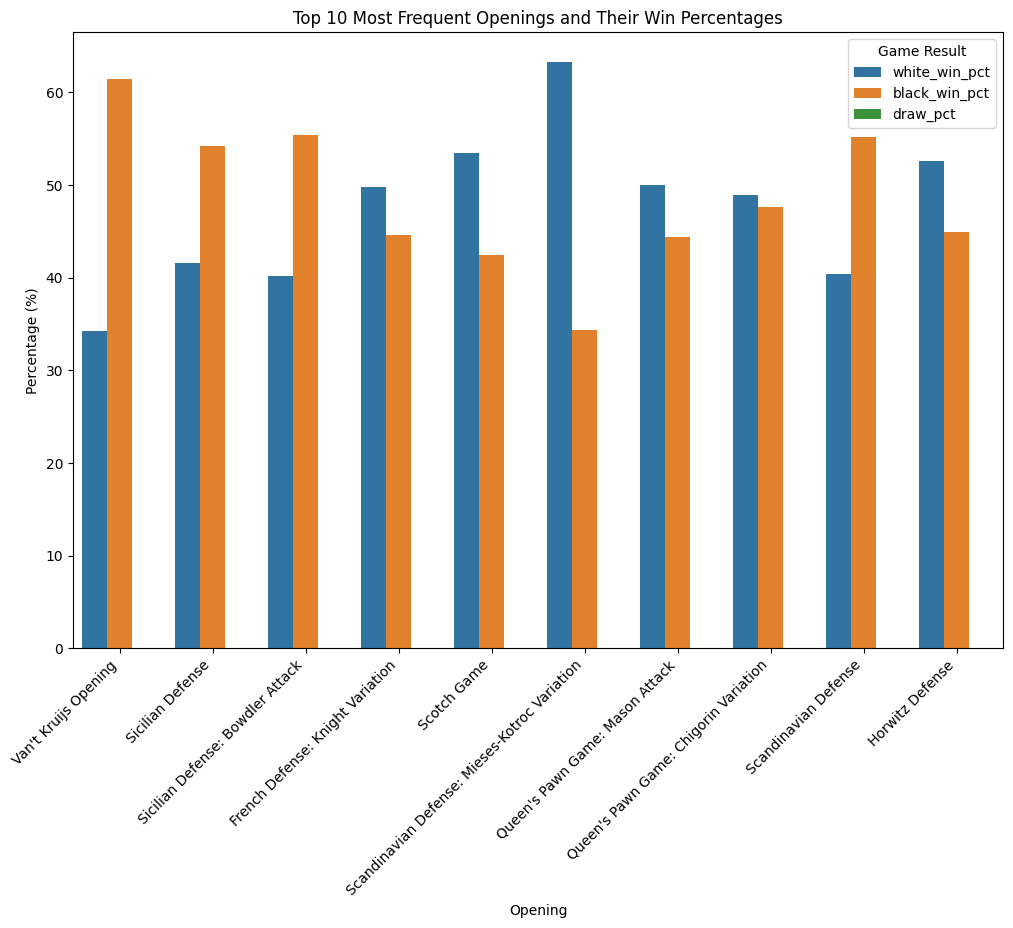

In [11]:
 # Counting the most frequent openings and calculating their win percentages
# Grouping data by opening name to calculate total games and win percentages

# Calculating total games per opening and win percentages for white and black
openings_data = data.groupby('opening_name').agg(
    total_games=('id', 'count'),
    white_win_pct=('winner', lambda x: (x == 'white').mean() * 100),
    black_win_pct=('winner', lambda x: (x == 'black').mean() * 100),
    draw_pct=('winner', lambda x: x.isna().mean() * 100)
).reset_index()

# Selecting the top 10 most frequent openings
top_openings = openings_data.nlargest(10, 'total_games')

# Melting the DataFrame for easier plotting in seaborn (to show white/black win rates and draws)
top_openings_melted = top_openings.melt(id_vars=['opening_name', 'total_games'], 
                                        value_vars=['white_win_pct', 'black_win_pct', 'draw_pct'],
                                        var_name='Result', value_name='Percentage')

# Plotting the most popular openings and their win percentages
plt.figure(figsize=(12, 8))
sns.barplot(data=top_openings_melted, x='opening_name', y='Percentage', hue='Result')
plt.title('Top 10 Most Frequent Openings and Their Win Percentages')
plt.xlabel('Opening')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Game Result')
plt.show()
